# Plots and Figures of AGN FP CARMA Data

## Introduction and Imports

### Filter Type

Specifies the filter used from the forced photometry data. 

**This line is required in order to run most cells in this workbook.** The filter type is used when accessing, saving, and parsing dataframes and files

In [29]:
filter_type = 'r'

### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import corner
import matplotlib.pyplot as plt

In [3]:
agn_dataframe = pd.read_parquet(f'AGN_FP_{filter_type}_MasterDF.parquet')
agn_dataframe

,Filenames,RA,DEC,field,Times (JD),Magnitudes,Mag Errors,Best DRW Fit,Best DRW ARMA Fit,DRW chisq,...,tau_decay,tau_rise_dqpo,tau_perturb,tau_decorr,omega_0,oscillation,good timescale fit,tau_decay fit,tau_rise_dqpo fit,tau_decorr fit
0,fp_lc_0.20323455_-7.1532089_field_1389.csv,0.2,-7.2,1389,"[2458353.8754282, 2458362.8815394, 2458719.940...","[21.114627750693703, 21.289021923923134, 21.94...","[0.3386452047814808, 0.3950931108889877, 0.577...","[1.0890750261579591, 1.010050167084168]","[0.3992328749481987, 3.930495413751836]",4.387582e-03,...,5.411707e+02,0.344877,0.041544,5.417313e-01,18.218633,underdamped,False,ontime,undertime,undertime
1,fp_lc_0.20323455_-7.1532089_field_395.csv,0.2,-7.2,395,"[2458274.9818287, 2458283.9800926, 2458290.980...","[20.92020347085257, 22.432021890399437, 21.481...","[0.5943087735637443, 1.8142867589951983, 0.688...","[1.010050167084168, 3.4151082310929746]","[0.3715581744238082, 122.19329622113878]",7.087514e-02,...,6.092145e+07,0.012785,1219.727463,9.569520e+07,0.001133,overdamped,False,overtime,ontime,overtime
2,fp_lc_0.8642925999999999_27.654793_field_1645.csv,0.9,27.7,1645,"[2458326.8911343, 2458327.9079167, 2458334.884...","[21.348698132565097, 21.49658811297937, 20.925...","[0.6736513397863145, 0.8380042940550074, 0.280...","[1.010050167084168, 101.58972026029552]","[0.3715581744238082, 1.2125547571466234e+62]",5.824487e-24,...,3.201038e+06,0.060006,27827.643945,9.425742e-02,104.709044,underdamped,False,overtime,ontime,ontime
3,fp_lc_0.8642925999999999_27.654793_field_600.csv,0.9,27.7,600,"[2458271.943206, 2458283.9677315, 2458289.9685...","[22.596542670127025, 21.95674181070741, 22.465...","[2.039169973894654, 0.5683894481210139, 0.7542...","[1.010050167084168, 6.8477853267893725]","[0.3715581744238082, 15304.934601290344]",2.943597e-07,...,2.936172e+02,0.010124,1.595498,4.612287e+02,0.580008,overdamped,True,ontime,ontime,ontime
4,fp_lc_1.0082763_70.3217215_field_1880.csv,1.0,70.3,1880,"[2458332.8937384, 2458355.8120833, 2458357.834...","[21.763203502015056, 22.469045959012988, 22.68...","[1.1931352029130742, 1.389484154205049, 1.8009...","[1.010050167084168, 22026.465794806718]","[0.3715581744238082, inf]",0.000000e+00,...,6.764863e+05,0.122101,0.093742,1.917956e-01,51.458979,underdamped,False,overtime,ontime,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,fp_lc_90.658166_65.3713197_field_1845.csv,90.7,65.4,1845,"[2458429.8649884, 2458432.8586458, 2458435.870...","[19.51079332398352, 19.92874020917677, 22.7776...","[0.0649831366493067, 0.1276850558972109, 3.108...","[1.010050167084168, 1.010050167084168]","[0.3715581744238082, 4.142511876711821]",5.420336e+01,...,1.648955e+01,0.000550,0.261621,2.590258e+01,10.504672,overdamped,True,ontime,ontime,ontime
540,fp_lc_90.658166_65.3713197_field_812.csv,90.7,65.4,812,"[2458244.6648264, 2458323.9908102, 2458329.992...","[20.55106329429142, 20.083038610175493, 21.253...","[0.3859598015347237, 0.2101551264309361, 0.652...","[1.010050167084168, 1.010050167084168]","[0.3715581744238082, 4.142511876711821]",1.123338e+01,...,1.280596e+02,0.004525,1.343708,2.011626e+02,1.313626,overdamped,True,ontime,ontime,ontime
541,fp_lc_93.9014798_71.03749785_field_838.csv,93.9,71.0,838,"[2458221.6981481, 2458249.6584954, 2458337.987...","[19.236577335792735, 17.29988814022734, 18.877...","[0.2172951448825648, 0.056031439392939, 0.0508...","[3.268897584545039, 1.010050167084168]","[0.736450297401709, 2.2035174544736105]",4.307139e+02,...,1.783735e+00,0.005852,80.029165,9.192099e-03,1073.705183,underdamped,True,ontime,ontime,ontime
542,fp_lc_98.19657765_63.6736939_field_1845.csv,98.2,63.7,1845,"[2458429.8649884, 2458431.8742245, 2458432.858...","[19.08237525461287, 19.19463588394012, 19.4966...","[0.0451967837835527, 0.1375214022637934, 0.102...","[1.010050167084168, 1.010050167084168]","[0.3715581744238082, 4.142511876711821]",7.749060e+00,...,1.153917e+01,0.003757,0.045029,5.900774e-03,1672.594809,underdamped,T

### SNR, LC Length, and log Lbol

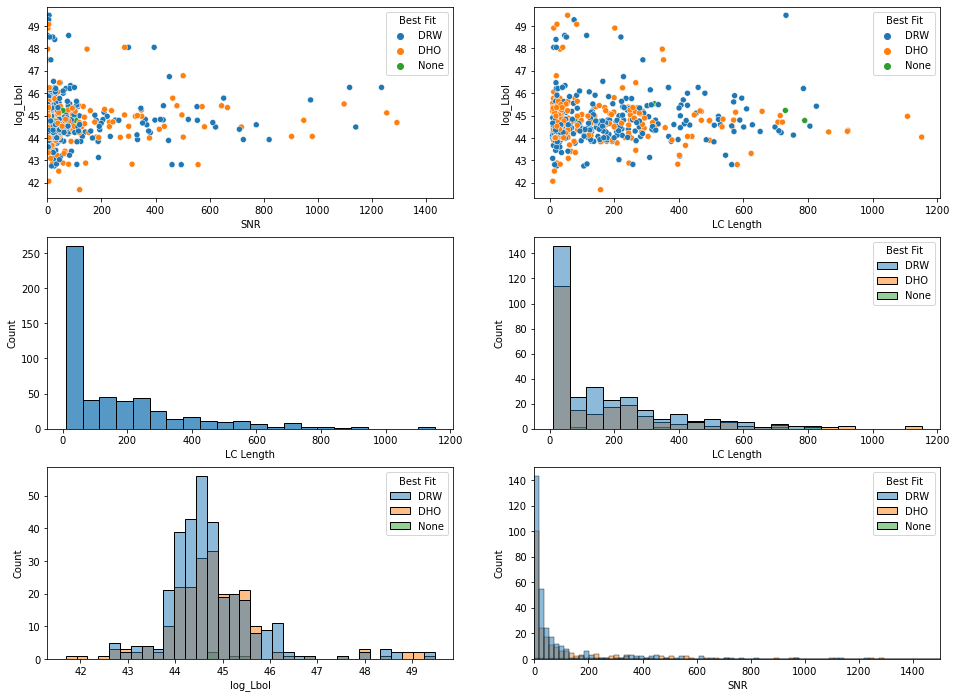

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

row = 0
# SNR vs log LBol
sns.scatterplot(data=agn_dataframe, x='SNR', y ='log_Lbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# LC Length vs log LBol
sns.scatterplot(data=agn_dataframe, x='LC Length', y ='log_Lbol', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of LC Length
sns.histplot(data=agn_dataframe, x='LC Length', ax=axs[row,0])
# histogram of LC Length for best fit
sns.histplot(data=agn_dataframe, x='LC Length', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of log LBol for best fit
sns.histplot(data=agn_dataframe, x='log_Lbol', hue='Best Fit', ax=axs[row,0])
# histogram of SNR for best fit
sns.histplot(data=agn_dataframe, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 

plt.savefig(f'FP_{filter_type}_SNR_LCLength_Lbol.png')
plt.show()

- - -
- - -

## Chapter 1: DRW Terms

### 1.1 Terms vs. Lbol

In [5]:
# Since DRW terms are saved as a numpy array, a new df needs to be created where
# each of the terms are in their own column in order to be plotted with matplotlib

taus = []
amps = []
Lbols = []
good_timescale_fits = []

for index, row in agn_dataframe.iterrows():
    best_fit= row['Best Fit']
    DRW_term = row['Best DRW ARMA Fit']
    Lbol = row['log_Lbol']
    good_timescale_fit = row['good timescale fit']
    
    taus.append(DRW_term[0])
    amps.append(DRW_term[1])
    Lbols.append(Lbol)
    good_timescale_fits.append(good_timescale_fit)

drw_data = pd.DataFrame({'tau': taus, 'amp': amps, 'log_Lbol': Lbols, 'good timescale fit': good_timescale_fits})

C:\Users\Caleb\anaconda3\lib\site-packages\numpy\ma\core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


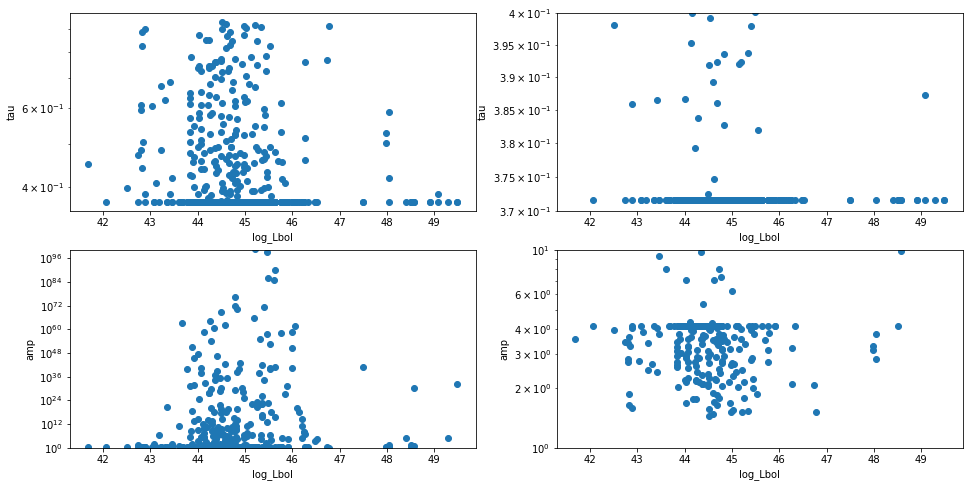

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

row = 0
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 0
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(3.7e-1,4e-1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 1
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e100)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

row = 1
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

plt.savefig(f'FP_{filter_type}_DRW.png')
plt.show()

### 1.2 tau vs. amp

C:\Users\Caleb\anaconda3\lib\site-packages\numpy\ma\core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


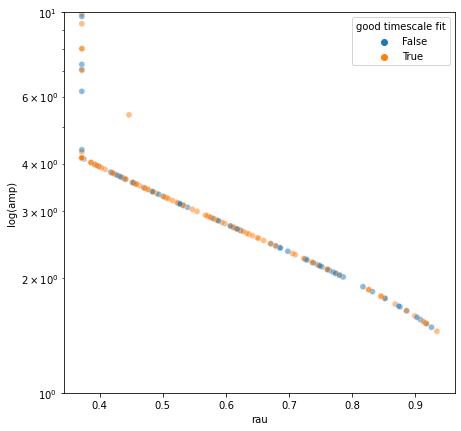

In [7]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=drw_data, x='tau', y='amp', hue='good timescale fit', alpha=0.5)

# does not make a difference between # and not #
# ax.set_xscale('log')

ax.set_yscale('log')
ax.set_xlabel('rau')
ax.set_ylabel('log(amp)')

plt.savefig(f'FP_{filter_type}_tau_vs_amp.png')

- - -
- - -

## Chapter 2: DHO Timescales Fit

In [15]:
# exclude fits for which DHO_chi_sq is infinity
# agn_dataframe = agn_dataframe[agn_dataframe['DHO chisq'] != np.inf]

### 2.1 log_Lbol vs timescales

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Lbol'

# xi
row = 0
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='xi', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decay', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_perturb', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decorr', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='omega_0', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig(f'FP_{filter_type}_timescales_Lbol.png')

### 2.2 log_Mbh vs timescales

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Mbh'

# xi
row = 0
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='xi', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decay', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_perturb', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decorr', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='omega_0', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig(f'FP_{filter_type}_timescales_Mbh.png')

### 2.3 log_Lbol vs z[OIII]_x

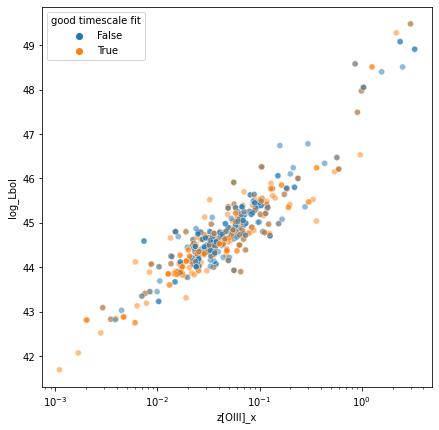

In [11]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=agn_dataframe, x='z[OIII]_x', y='log_Lbol', hue='good timescale fit', alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('z[OIII]_x')
ax.set_ylabel('log_Lbol')

plt.savefig(f'FP_{filter_type}_z[OIII]_x_Lbol.png')

### 2.4 xi vs omega_0

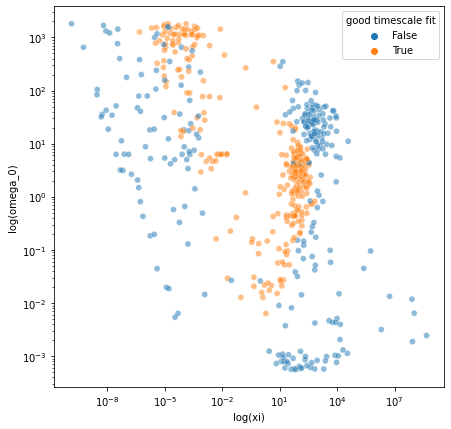

In [12]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=agn_dataframe, x='xi', y='omega_0', hue='good timescale fit', alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(xi)')
ax.set_ylabel('log(omega_0)')

plt.savefig(f'FP_{filter_type}_xi_vs_omega0.png')

- - -
- - -

## Chapter 3: Timescales vs. Timescales

In [35]:
# exclude fits for which DHO_chi_sq is infinity
# agn_dataframe = agn_dataframe[agn_dataframe['DHO chisq'] != np.inf]

len(agn_dataframe)

544

### 3.1 c_ax = log_Lbol

In [ ]:
x_ax = 'log_Lbol'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decay', x_ax, f'FP_{filter_type}_timescales_tau_decay_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_rise_dqpo', x_ax, f'FP_{filter_type}_timescales_tau_rise_dqpo_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_perturb', x_ax, f'FP_{filter_type}_timescales_tau_perturb_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decorr', x_ax, f'FP_{filter_type}_timescales_tau_decorr_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'omega_0', x_ax, f'FP_{filter_type}_timescales_omega_0_{x_ax}', log_x=True, log_c=True, alpha=0.5)

### 3.2 c_ax = log_Mbh

In [ ]:
x_ax = 'log_Mbh'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decay', x_ax, f'FP_{filter_type}_timescales_tau_decay_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_rise_dqpo', x_ax, f'FP_{filter_type}_timescales_tau_rise_dqpo_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_perturb', x_ax, f'FP_{filter_type}__timescales_tau_perturb_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decorr', x_ax, f'FP_{filter_type}_timescales_tau_decorr_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'omega_0', x_ax, f'FP_{filter_type}_timescales_omega_0_{x_ax}', log_x=True, log_c=True, alpha=0.5)

### 3.3 c_ax = z[OIII]_x

In [ ]:
x_ax = 'z[OIII]_x'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decay', x_ax, f'FP_{filter_type}_timescales_tau_decay_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_rise_dqpo', x_ax, f'FP_{filter_type}_timescales_tau_rise_dqpo_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_perturb', x_ax, f'FP_{filter_type}_timescales_tau_perturb_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decorr', x_ax, f'FP_{filter_type}_timescales_tau_decorr_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'omega_0', x_ax, f'FP_{filter_type}_timescales_omega_0_{x_ax}', log_x=True, log_c=True, alpha=0.5)

- - -
- - -

## Chapter 4: Timescales vs. DHO Terms

In [3]:
# exclude fits for which DHO_chi_sq is infinity
# agn_dataframe = agn_dataframe[agn_dataframe['DHO chisq'] != np.inf]

#### dho_fit_data

Create dataframe of DHO terms and relevant data for plots used in this chapter

In [22]:
a1s = []
a2s = [] 
b0s = []
b1s = []

for index, row in agn_dataframe.iterrows():
    dho_terms = row['DHO MCMC Fit']
    
    a1s.append(dho_terms[0])
    a2s.append(dho_terms[1])
    b0s.append(dho_terms[2])
    b1s.append(dho_terms[3])
    
dho_fit_data = pd.DataFrame({'BAT ID': agn_dataframe['BAT ID'], 'log_Lbol': agn_dataframe['log_Lbol'], 'log_Mbh': agn_dataframe['log_Mbh'],
                             'a1': a1s, 'a2': a2s, 'b0': b0s, 'b1': b1s,
                             'SNR': agn_dataframe['SNR'], 'z[OIII]_x': agn_dataframe['z[OIII]_x'], 'log_Eratio': agn_dataframe['log_Eratio'], 
                             'xi': agn_dataframe['xi'], 
                             'tau_decay': agn_dataframe['tau_decay'], 'tau_rise_dqpo': agn_dataframe['tau_rise_dqpo'], 'tau_perturb': agn_dataframe['tau_perturb'], 'tau_decorr': agn_dataframe['tau_decorr'], 
                             'omega_0': agn_dataframe['omega_0']})
dho_fit_data

,BAT ID,log_Lbol,log_Mbh,a1,a2,b0,b1,SNR,z[OIII]_x,log_Eratio,xi,tau_decay,tau_rise_dqpo,tau_perturb,tau_decorr,omega_0
0,1.0,44.53,6.42,3.695691e-03,3.319186e+02,1.892155e+00,0.078607,36.396444,0.037484,0.00,1.014261e-04,5.411707e+02,0.344877,0.041544,5.417313e-01,18.218633
1,1.0,44.53,6.42,7.821688e+01,1.283897e-06,5.081432e-03,6.197962,5.370125,0.037484,0.00,3.451480e+04,6.092145e+07,0.012785,1219.727463,9.569520e+07,0.001133
2,4.0,44.58,7.85,6.247974e-07,1.096398e+04,2.665591e-08,0.000742,16.201312,0.039689,NaN,2.983493e-09,3.201038e+06,0.060006,27827.643945,9.425742e-02,104.709044
3,4.0,44.58,7.85,9.877897e+01,3.364093e-01,4.067534e+00,6.489744,11.431350,0.039689,NaN,8.515310e+01,2.936172e+02,0.010124,1.595498,4.612287e+02,0.580008
4,5.0,45.38,NaN,2.956453e-06,2.648026e+03,1.901238e-02,0.001782,3.493798,0.096416,NaN,2.872631e-08,6.764863e+05,0.122101,0.093742,1.917956e-01,51.458979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,317.0,44.01,8.94,1.819651e+03,1.103481e+02,1.690591e+02,44.229399,37.610321,0.017491,NaN,8.661153e+01,1.648955e+01,0.000550,0.261621,2.590258e+01,10.504672
540,317.0,44.01,8.94,2.209892e+02,1.725614e+00,1.005078e+01,13.505311,34.716516,0.017491,NaN,8.411419e+01,1.280596e+02,0.004525,1.343708,2.011626e+02,1.313626
541,325.0,44.66,6.80,1.121243e+00,1.152843e+06,1.299473e-02,1.039957,38.677716,0.013439,-0.25,5.221371e-04,1.783735e+00,0.005852,80.029165,9.192099e-03,1073.705183
542,337.0,44.53,7.61,1.733227e-01,2.797573e+06,1.363176e+01,0.613819,54.630965,0.040417,NaN,5.181250e-05,1.153917e+01,0.003757,0.045029,5.900774e-03,1672.594809


### 4.1 c_ax = log_Lbol

In [ ]:
c_ax = 'log_Lbol'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, alpha=0.5)

### 4.2 c_ax = log_Mbh

In [ ]:
c_ax = 'log_Mbh'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, alpha=0.5)

### 4.3 c_ax = z[OIII]_x

In [ ]:
c_ax = 'z[OIII]_x'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, log_c=True, alpha=0.5)

### 4.4 c_ax = SNR

In [ ]:
c_ax = 'SNR'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, log_c=True, alpha=0.5)

### 4.5 c_ax = log_Eratio

In [ ]:
c_ax = 'log_Eratio'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, alpha=0.5)

### 4.6 Fig. 3 and Fig. 10

Remaking of figures 3 and 10 from *Examining AGN UV/optical Variability Beyond the Simple Damped Random Walk* by Weixiang Yu, et al. 

[source](https://arxiv.org/pdf/2201.08943.pdf)

#### Figure 3 (page 6)

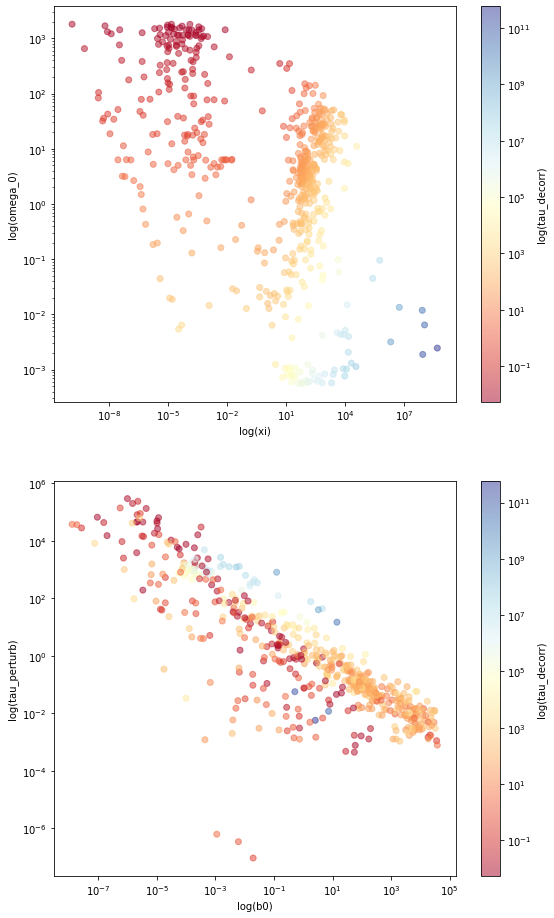

In [31]:
import matplotlib.colors as colors

fig, axs = plt.subplots(2, figsize=(9, 16))
cm = plt.cm.get_cmap('RdYlBu')
c_ax = 'tau_decorr'
alpha = 0.5

# xi
col = 0
sc = axs[col].scatter(data=dho_fit_data, x='xi', y='omega_0', c=c_ax, cmap=cm, norm=colors.LogNorm(), alpha=alpha)
cbar = fig.colorbar(sc, ax=axs[col])
cbar.set_label(f'log({c_ax})')
axs[col].set_xscale('log')
axs[col].set_yscale('log')
axs[col].set_xlabel('log(xi)')
axs[col].set_ylabel('log(omega_0)')

col = 1
sc = axs[col].scatter(data=dho_fit_data, x='b0', y='tau_perturb', c=c_ax, cmap=cm, norm=colors.LogNorm(), alpha=alpha)
cbar = fig.colorbar(sc, ax=axs[col])
cbar.set_label(f'log({c_ax})')
axs[col].set_xscale('log')
axs[col].set_yscale('log')
axs[col].set_xlabel('log(b0)')
axs[col].set_ylabel('log(tau_perturb)')

plt.savefig(f'FP_{filter_type}_figure_3.png')

#### Figure 10 (page 15)

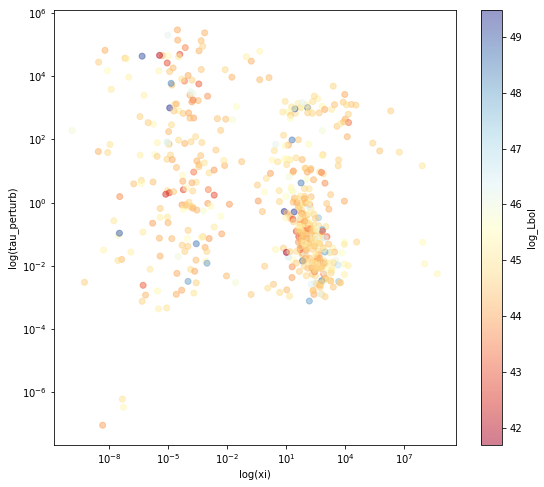

In [32]:
fig, ax = plt.subplots(figsize=(9, 8))
cm = plt.cm.get_cmap('RdYlBu')
c_ax = 'log_Lbol'
alpha = 0.5

sc = ax.scatter(data=dho_fit_data, x='xi', y='tau_perturb', c=c_ax, cmap=cm, alpha=alpha)
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(c_ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(xi)')
ax.set_ylabel('log(tau_perturb)')

plt.savefig(f'FP_{filter_type}_figure_10.png')

- - -
- - -

## Appendix A: Functions

Miscillaneous Functions that are useful or used multiple times throughout this workbook

#### timescale_color_plot()

In [74]:
import matplotlib.colors as colors
def timescale_color_plot(dataframe, x_ax, c_ax, name='', log_x=False, log_c=False, marker=[['o'], None], alpha=1):
    """Plot a given value against each timescale value and color code along a provided axis. Assumes that the
        timescale keys in the provided dataframe are the following:
        
            ['xi', 'tau_decay', 'tau_rise_dqpo', 'tau_perturb', 'tau_perturb', 'tau_decorr', 'omega_0']
            
        Import dependencies:
            - numpy as np
            - matplotlib as plt
            - seaborn as sns
            - pandas as pd
    
    - dataframe: Pandas dataframe
    
    - x_ax: String key of dataframe colemn to plot on the x-axis
    
    - c_ax: String key of dataframe colemn to plot on the color bar
    
    - name: String the name of the figure that is saved (saved as .png). Will not be saved unless a name is specified
    
    - log_x: Boolean of whether to plot the x-axis in logarithmic scale
    
    - log_c: Boolean of whether to plot the color bar in logarithmic scale
    
    - marker: List of a list of markers and the key of the dataframe colemn of identifier. Used to have
                unique markers for points based on a provided identifier
    
    - alpha: Float from 0.0 to 1.0 of the opacity of the points plotted
    
    """
    
    timescale_keys = ['xi', 'tau_decay', 'tau_rise_dqpo', 'tau_perturb', 'tau_perturb', 'tau_decorr', 'omega_0']
    
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    cm = plt.cm.get_cmap('RdYlBu')

    c_scale = colors.LogNorm() if log_c else None
    
    # create new dataframe that separates data points based on given identifiers in marker[1]
    if marker[1] != None: 
        
        # create list of possible identifiers
        identifiers = list(set(dataframe[marker[1]]))
        # Explanation of above line:
        # - gets the colemn of identifers from the dataframe as a list
        # - converts list to a set to get all the unique identifiers
        # - converts set back into a list containing only the unique identifiers

        # throw error if len(marker[0]) > # of identifiers  in marker[1]
        if len(marker[0]) < len(identifiers):
            raise ValueError(f'Length of markers (={len(marker[0])}) cannot be less than number of identifiers (={len(identifiers)})!')
        
        # initilize DICTIONARY of dataframes 
        dataframes = {}
        for identifier in identifiers:
            dataframes[identifier] = pd.DataFrame()
            
        # save values to a dataframe in the list based on identifer
            
        
    
    # make figure
    key_index =0
    for row in range(3):
        for col in range(2):
            sc = axs[row, col].scatter(data=dataframe, x=x_ax, y=timescale_keys[key_index], c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
            cbar = fig.colorbar(sc, ax=axs[row, col])
            cbar.set_label(c_ax)
            if log_x:
                axs[row, col].set_xscale('log')
            axs[row, col].set_yscale('log')
            axs[row, col].set_xlabel(x_ax)
            axs[row, col].set_ylabel(f'log({timescale_keys[key_index]})')
            
            key_index += 1
    
    # save figure
    if name != '':
        plt.savefig(f'{name}.png')

foo
2
2


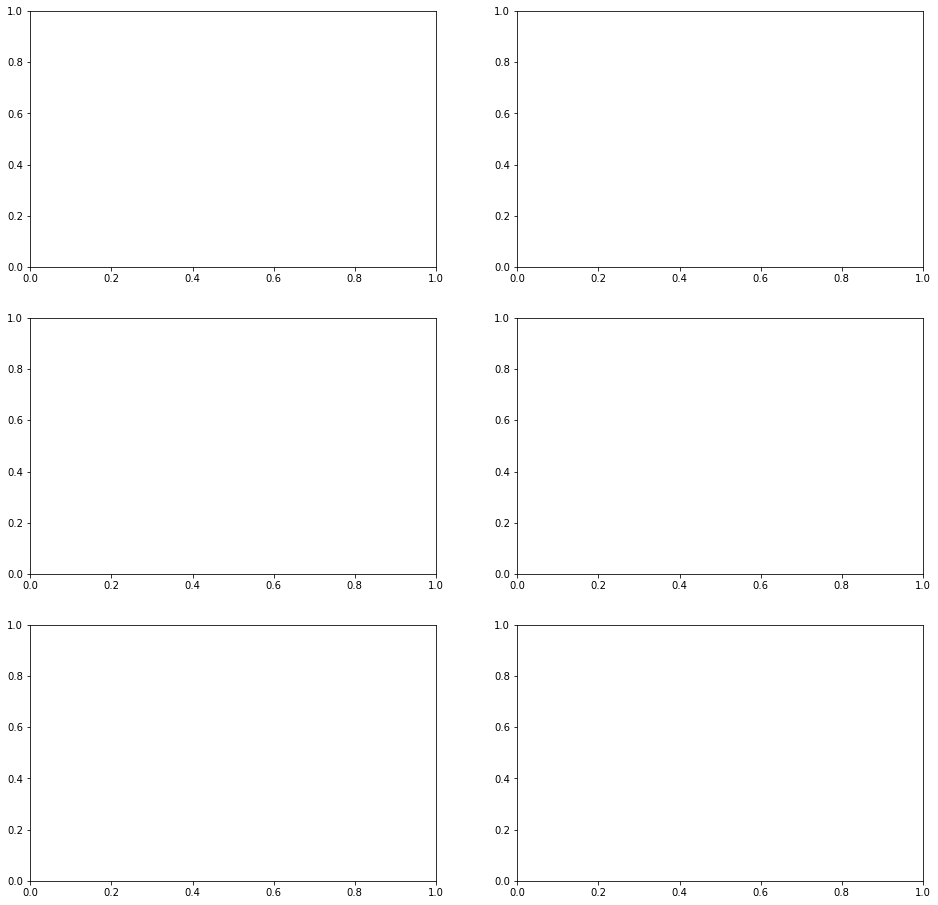

In [73]:
c_ax = 'log_Lbol'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, marker=[['.', 'x'], 'good timescale fit'], alpha=0.5)